# Redução de Dimensionalidade

Por vezes nos deparamos com problemas em que devemos lidar com um dataset de alta dimensionalidade, onde não é possível realizar o processamento necessário devido ao custo computacional envolvido no processo (Maldição da Dimensionalidade). 

Para estes casos, é interessante utilizar técnicas que realizam a redução da dimensão do nosso dataset sem comprometer a qualidade das informaçõe presentes nele. Para isso, desenvolveram-se técnicas de Aprendizado de Máquina capazes de realizar projeções e reduções de dimensionalidade no dataset de maneira otimizada e eficiente, mantendo a qualidade da informação.

# PCA (Principal Component Analysis)

In [1]:
# Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Importando o dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13]

In [3]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
np.array(y).T

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [6]:
# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
X_train.shape

(142, 13)

In [8]:
X_test.shape

(36, 13)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.876683,0.798429,0.644130,0.129743,0.488532,-0.703262,-1.428468,1.072457,-1.368203,0.351932,0.029017,-1.064122,-0.205908
1,-0.366591,-0.758130,-0.397799,0.333800,-1.413024,-1.441531,-0.502998,1.701100,0.023668,-0.841146,0.029017,-0.730832,-0.817047
2,-1.696894,-0.344248,-0.323375,-0.453279,-0.145320,1.249050,0.319642,-1.520697,-0.434631,-0.756829,0.901974,0.519005,-1.312565
3,0.516134,1.383263,0.420859,1.004275,0.136392,-0.752480,-1.233091,0.522394,-0.332787,0.950579,-1.105828,-1.425187,0.025334
4,0.640461,-0.506202,0.904612,0.129743,-0.286176,0.445157,0.679547,-0.656312,0.091564,-0.643002,0.727382,1.713295,0.339162


In [13]:
# Aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_ # As 2 componentes principais explicam o máximo da variância

In [14]:
explained_variance

array([0.36884109, 0.19318394])

In [15]:
X_train

array([[-2.17884511e+00, -1.07218467e+00],
       [-1.80819239e+00,  1.57822344e+00],
       [ 1.09829474e+00,  2.22124345e+00],
       [-2.55584748e+00, -1.66210369e+00],
       [ 1.85698063e+00,  2.41573166e-01],
       [ 2.58288576e+00, -1.37668170e+00],
       [ 8.72876119e-01,  2.25618512e+00],
       [-4.18384029e-01,  2.35415681e+00],
       [-3.04977245e-01,  2.27659433e+00],
       [ 2.14082532e+00, -1.10052871e+00],
       [-2.98136465e+00, -2.47159183e-01],
       [ 1.96188242e+00,  1.25407738e+00],
       [-2.16177795e+00, -9.75966550e-01],
       [ 2.21976084e+00, -2.39507167e+00],
       [-2.30179529e+00, -2.05791962e-01],
       [-3.00953827e+00, -2.79141212e-01],
       [ 2.63443473e+00, -8.68313119e-01],
       [-1.09219965e+00, -3.53906625e+00],
       [ 2.62578435e+00, -2.96852840e-03],
       [ 1.98077342e-01,  2.29193443e+00],
       [-2.67442753e+00, -2.58800132e+00],
       [-2.54763698e+00, -4.52703891e-01],
       [ 1.77416736e+00,  8.43586940e-01],
       [-2.

Assim, pode-se notar que X foi reduzido para 2 componentes principais, que são dimensões que o algoritmo encontrou para projetar os dados de modo à maximizar a variância dessas 2 componentes. Iremos avaliar um modelo de classificação e entender as vantagens de se usar PCA para este tipo de aplicação.

In [16]:
# Criando um modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# Prevendo os resultados
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


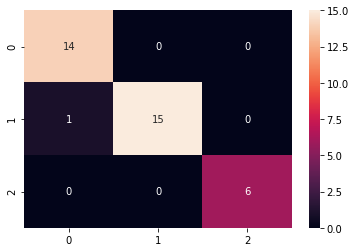

Acurácia: 0.9722222222222222


In [18]:
# Criando a matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot = True)
plt.show()
print("Acurácia: {}".format(acc))

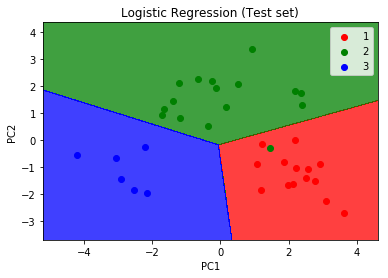

In [19]:
# Visualização dos resultados (conjunto de teste)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# LDA (Linear Discriminant Analysis)

Este algoritmo é um algoritmo de Redução de Dimensionalidade, porém é considerado Supervisionado, pois utiliza-se da informação dos rótulos de modo à maximizar a densidade de distribuição de probabilidade para cada classe.

In [20]:
# Importando o dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13]
y = dataset.iloc[:, 13]

# Dividindo em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Aplicando LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [22]:
pd.DataFrame(X_train).head()

,0,1
0,3.573156,1.940189
1,0.854759,-2.081830
2,0.621737,-3.062345
3,4.807864,2.006387
4,-3.857976,0.149873


In [23]:
# Criando um modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Prevendo os resultados
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

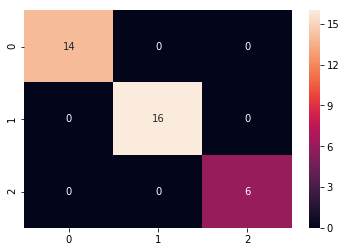

Acurácia: 1.0


In [25]:
# Criando a matriz de confusão
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot = True)
plt.show()
print("Acurácia: {}".format(acc))

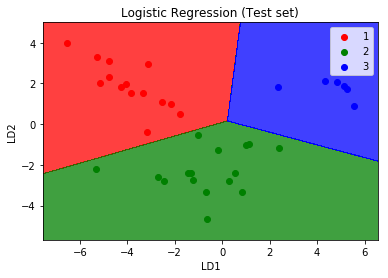

In [26]:
# Visualização dos resultados (conjunto de teste)
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()